#                       MAJOR PROJECT

# DATA CLEANING AND SUMMARY STATISTICS

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set()

In [5]:
 df=pd.read_csv("Documents/Car_Data.csv")


In [6]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [7]:
df.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,2.50


In [8]:
df.shape

(6019, 12)

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [10]:
df.rename(columns = {'Kilometers_Driven':'Kilometers Driven','Fuel_Type':'Fuel Type','Owner_Type':'Owner Type'}, inplace = True)

In [11]:
df.head()

,Name,Location,Year,Kilometers Driven,Fuel Type,Transmission,Owner Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [12]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers Driven     0
Fuel Type             0
Transmission          0
Owner Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [13]:
df = df.dropna() 

In [14]:
def nameChange(carName):
    return str(carName.split(' ')[0])
df.astype({'Name': 'str'}).dtypes
df['Name']=df['Name'].apply(nameChange)


In [15]:
def valueChange(carName):
    return str(carName.split(' ')[0])

def typeChange(column):
    column.astype(str)
    column=column.apply(valueChange)
    df['1']=column.apply(pd.to_numeric, downcast='float', errors='coerce')
    column=df['1']
    del df['1']
    return column

df['Mileage']=typeChange(df['Mileage'])
df['Engine']=typeChange(df['Engine'])
df['Power']=typeChange(df['Power'])


In [16]:
del df['Seats']

In [17]:
df.head()

,Name,Location,Year,Kilometers Driven,Fuel Type,Transmission,Owner Type,Mileage,Engine,Power,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.600000,998.0,58.160000,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.670000,1582.0,126.199997,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.200001,1199.0,88.699997,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.770000,1248.0,88.760002,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200000,1968.0,140.800003,17.74


In [18]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers Driven  5975 non-null   int64  
 4   Fuel Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   float64
 9   Power              5872 non-null   float64
 10  Price              5975 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 560.2+ KB


In [19]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers Driven      0
Fuel Type              0
Transmission           0
Owner Type             0
Mileage                0
Engine                 0
Power                103
Price                  0
dtype: int64

In [20]:
df.describe()

,Year,Kilometers Driven,Mileage,Engine,Power,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000,5872.000000,5975.000000
mean,2013.386778,5.867431e+04,18.179408,1621.606695,113.276894,9.501647
std,3.247238,9.155851e+04,4.521801,601.036987,53.881892,11.205736
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200001,0.440000
25%,2012.000000,3.390800e+04,15.200000,1198.000000,75.000000,3.500000
50%,2014.000000,5.300000e+04,18.160000,1493.000000,97.699997,5.650000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100006,9.950000
max,2019.000000,6.500000e+06,33.540001,5998.000000,560.000000,160.000000


In [21]:
df.nunique()

Name                   31
Location               11
Year                   22
Kilometers Driven    3080
Fuel Type               4
Transmission            2
Owner Type              4
Mileage               430
Engine                145
Power                 368
Price                1369
dtype: int64

## OUTLIER IDENTIFICATION AND REMOVAL

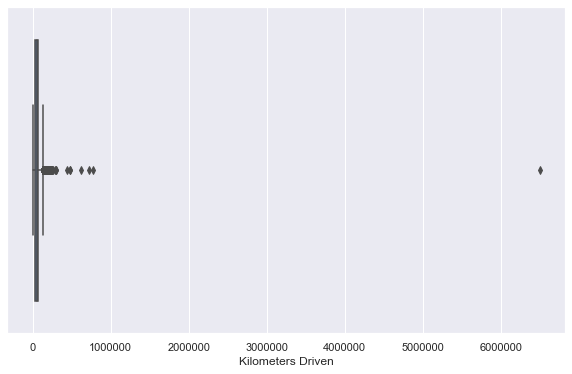

In [22]:
plt.figure(figsize=(10,6))
_=sns.boxplot(x=df['Kilometers Driven'])

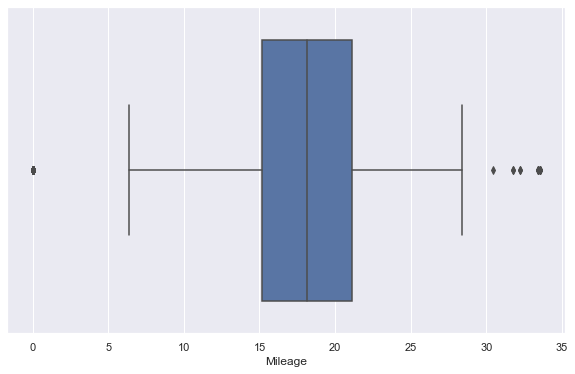

In [23]:
plt.figure(figsize=(10,6))
_=sns.boxplot(x=df['Mileage'])

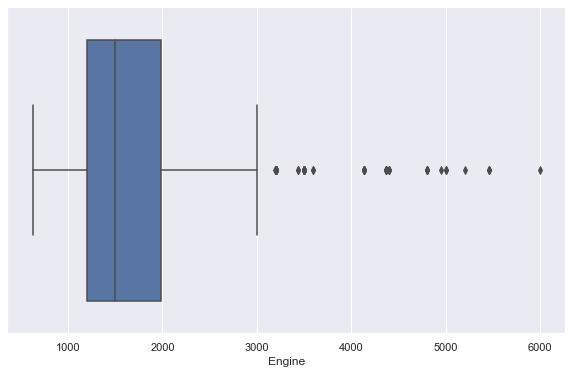

In [24]:
plt.figure(figsize=(10,6))
_=sns.boxplot(x=df['Engine'])

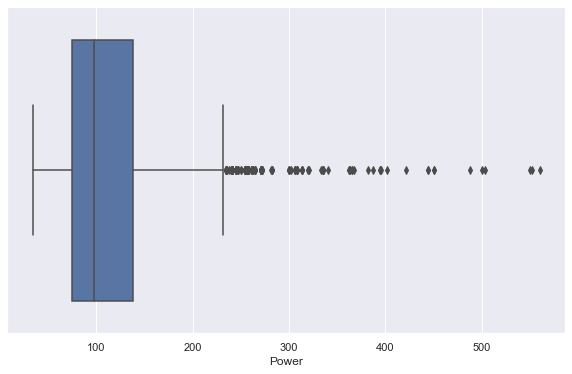

In [25]:
plt.figure(figsize=(10,6))
_=sns.boxplot(x=df['Power'])

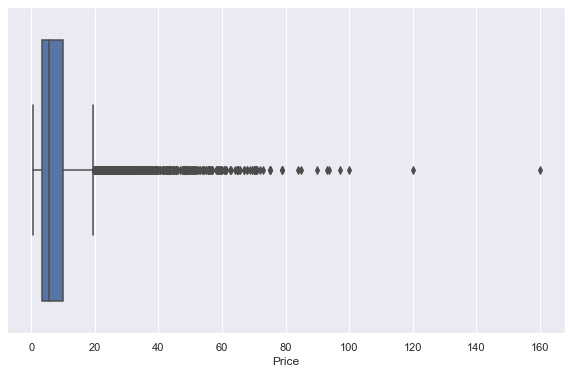

In [26]:
plt.figure(figsize=(10,6))
_=sns.boxplot(x=df['Price'])

In [27]:
df[df['Kilometers Driven']>6000000]

,Name,Location,Year,Kilometers Driven,Fuel Type,Transmission,Owner Type,Mileage,Engine,Power,Price
2328,BMW,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,65.0


In [28]:
df.at[2328,'Kilometers Driven']=df['Kilometers Driven'].median()

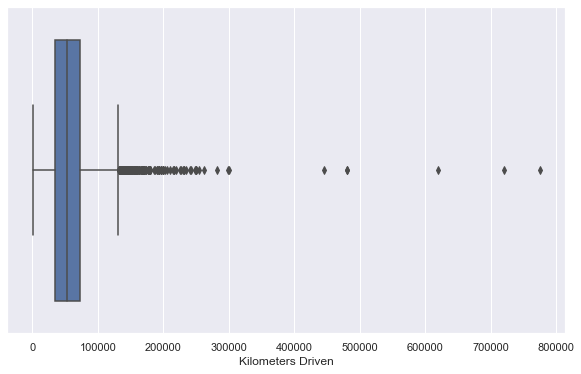

In [29]:
plt.figure(figsize=(10,6))
_=sns.boxplot(x=df['Kilometers Driven'])

# EDA

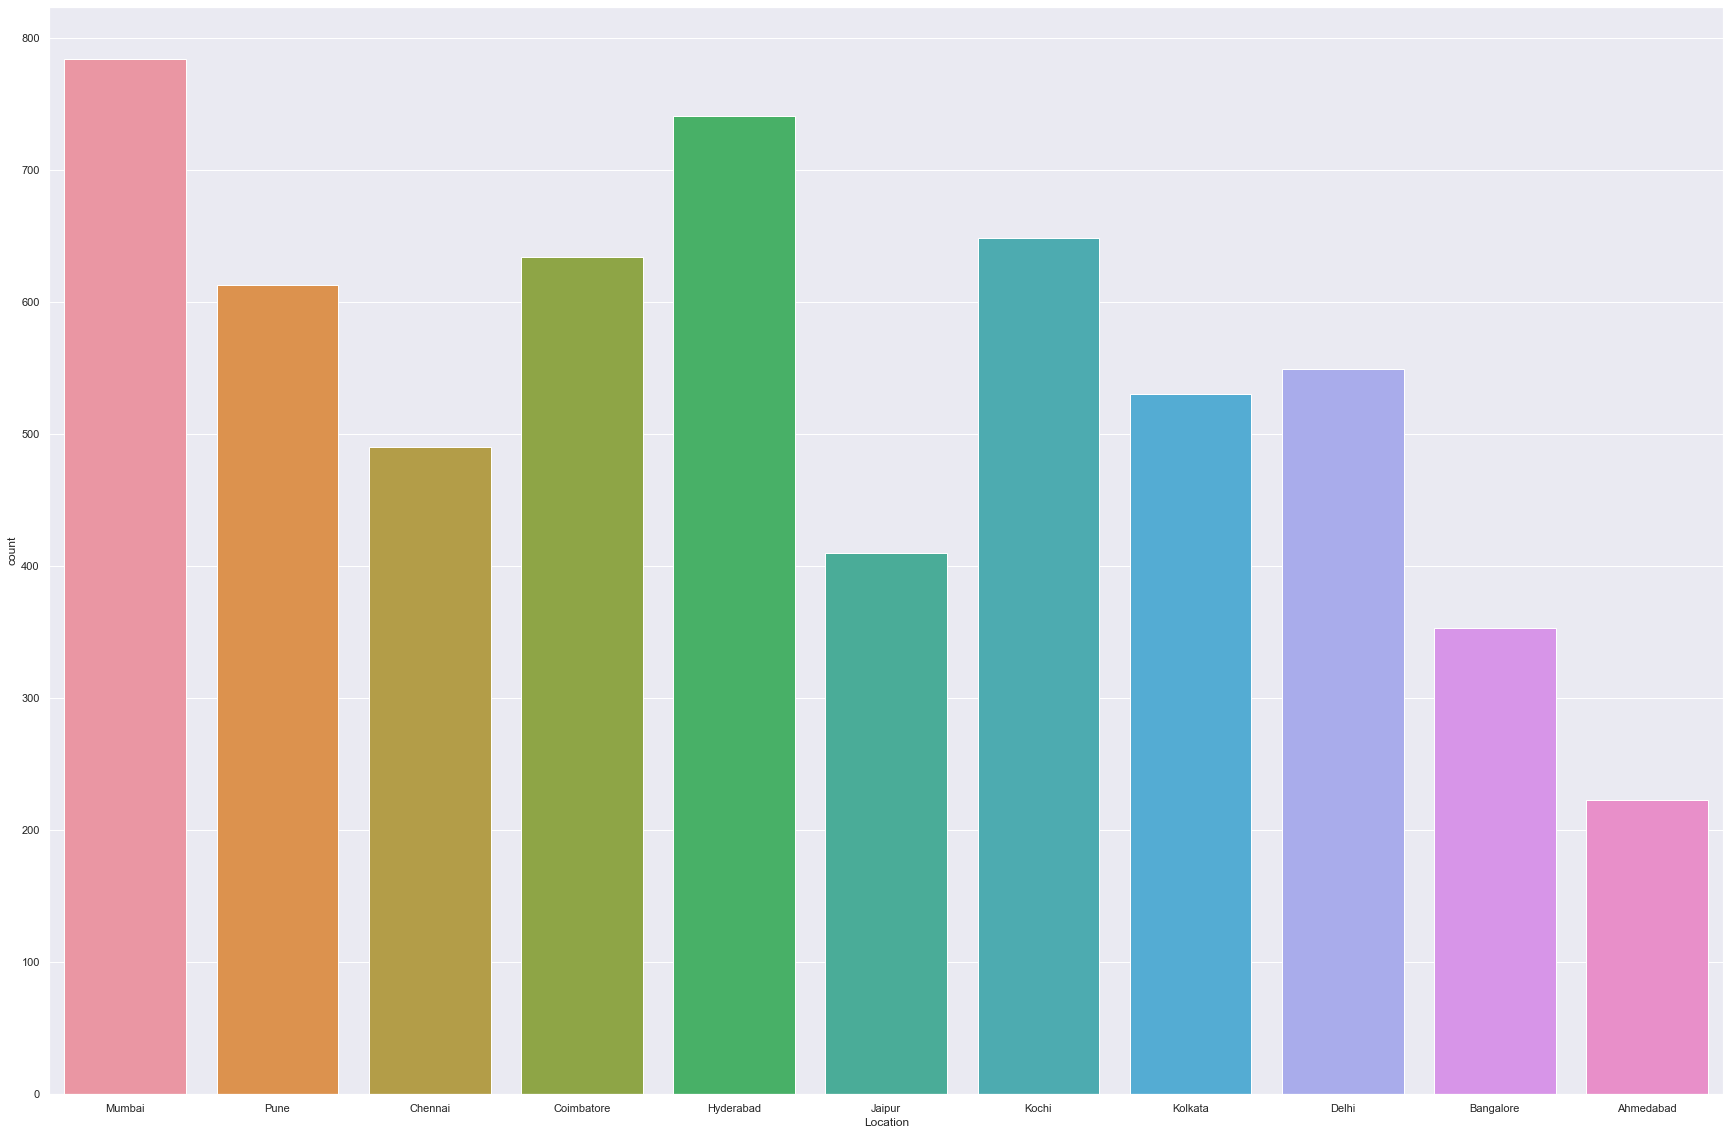

In [30]:
plt.figure(figsize=(30,20))
sns.countplot(x='Location',data=df)

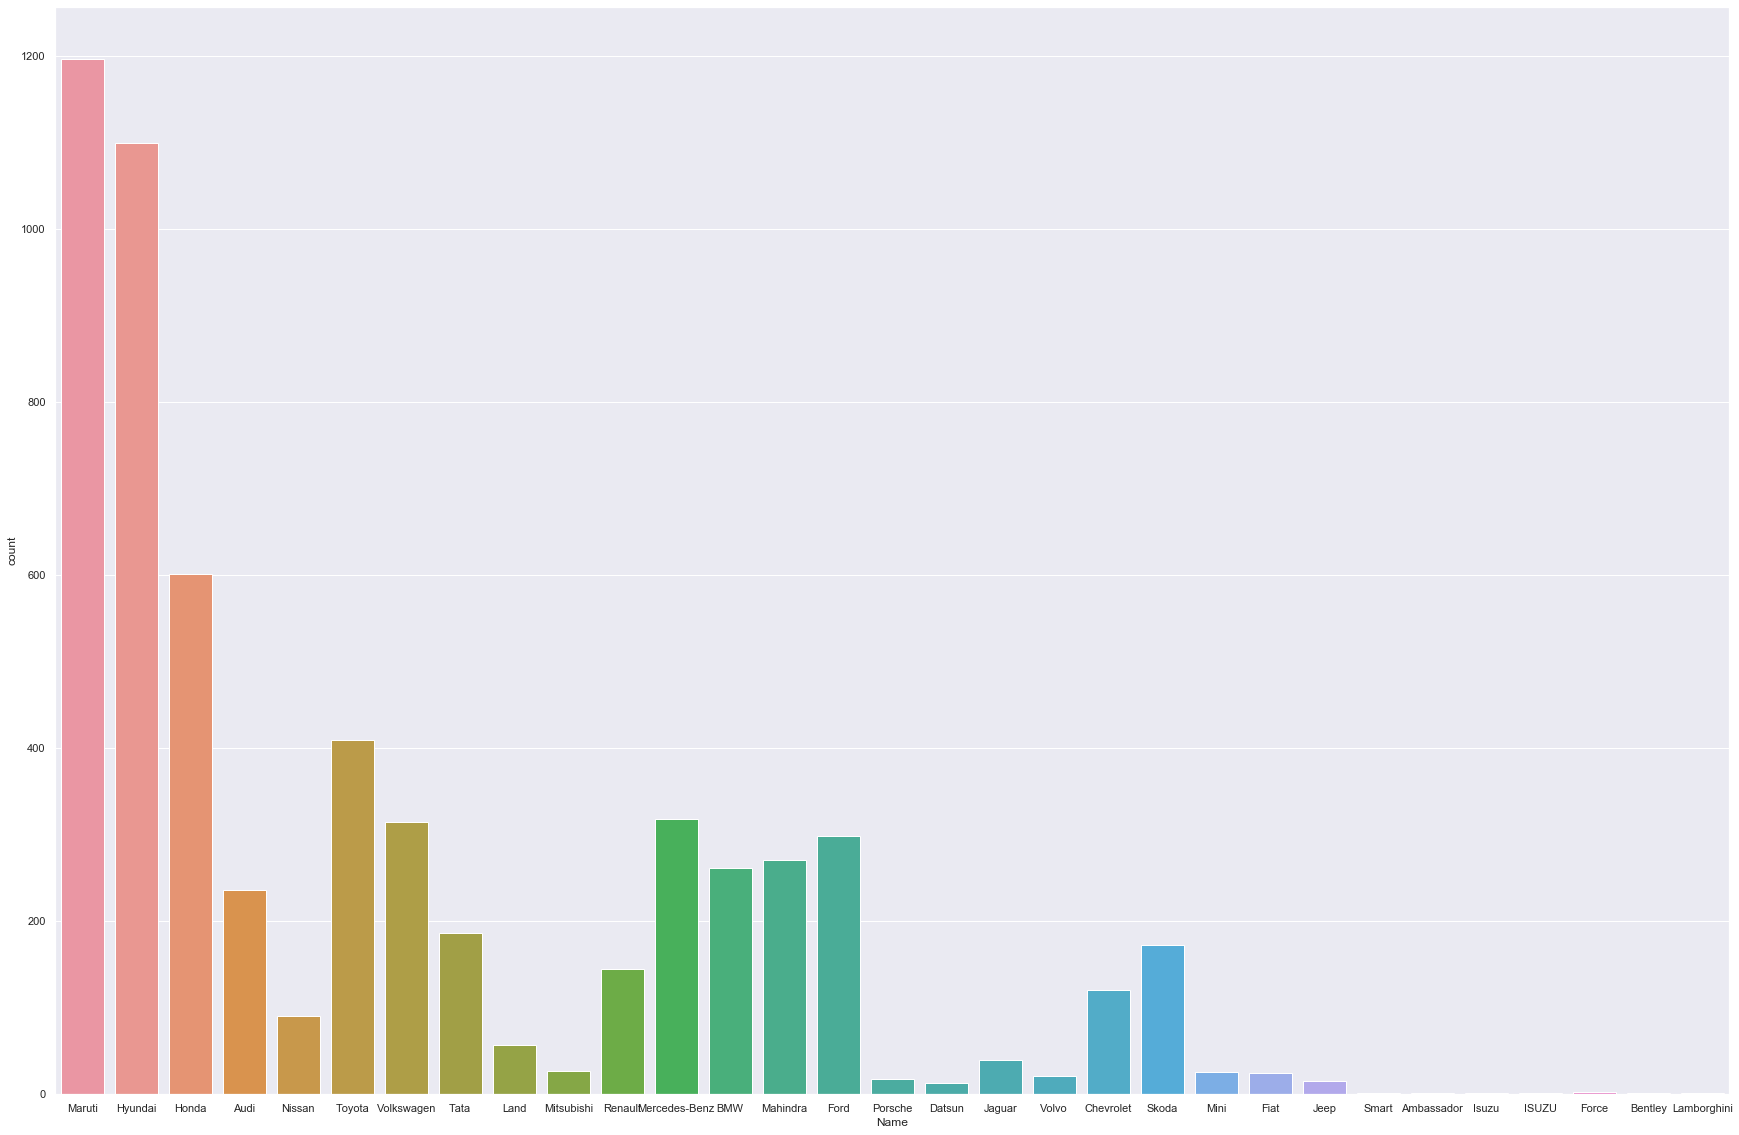

In [31]:
plt.figure(figsize=(30,20))
sns.countplot(x='Name',data=df)

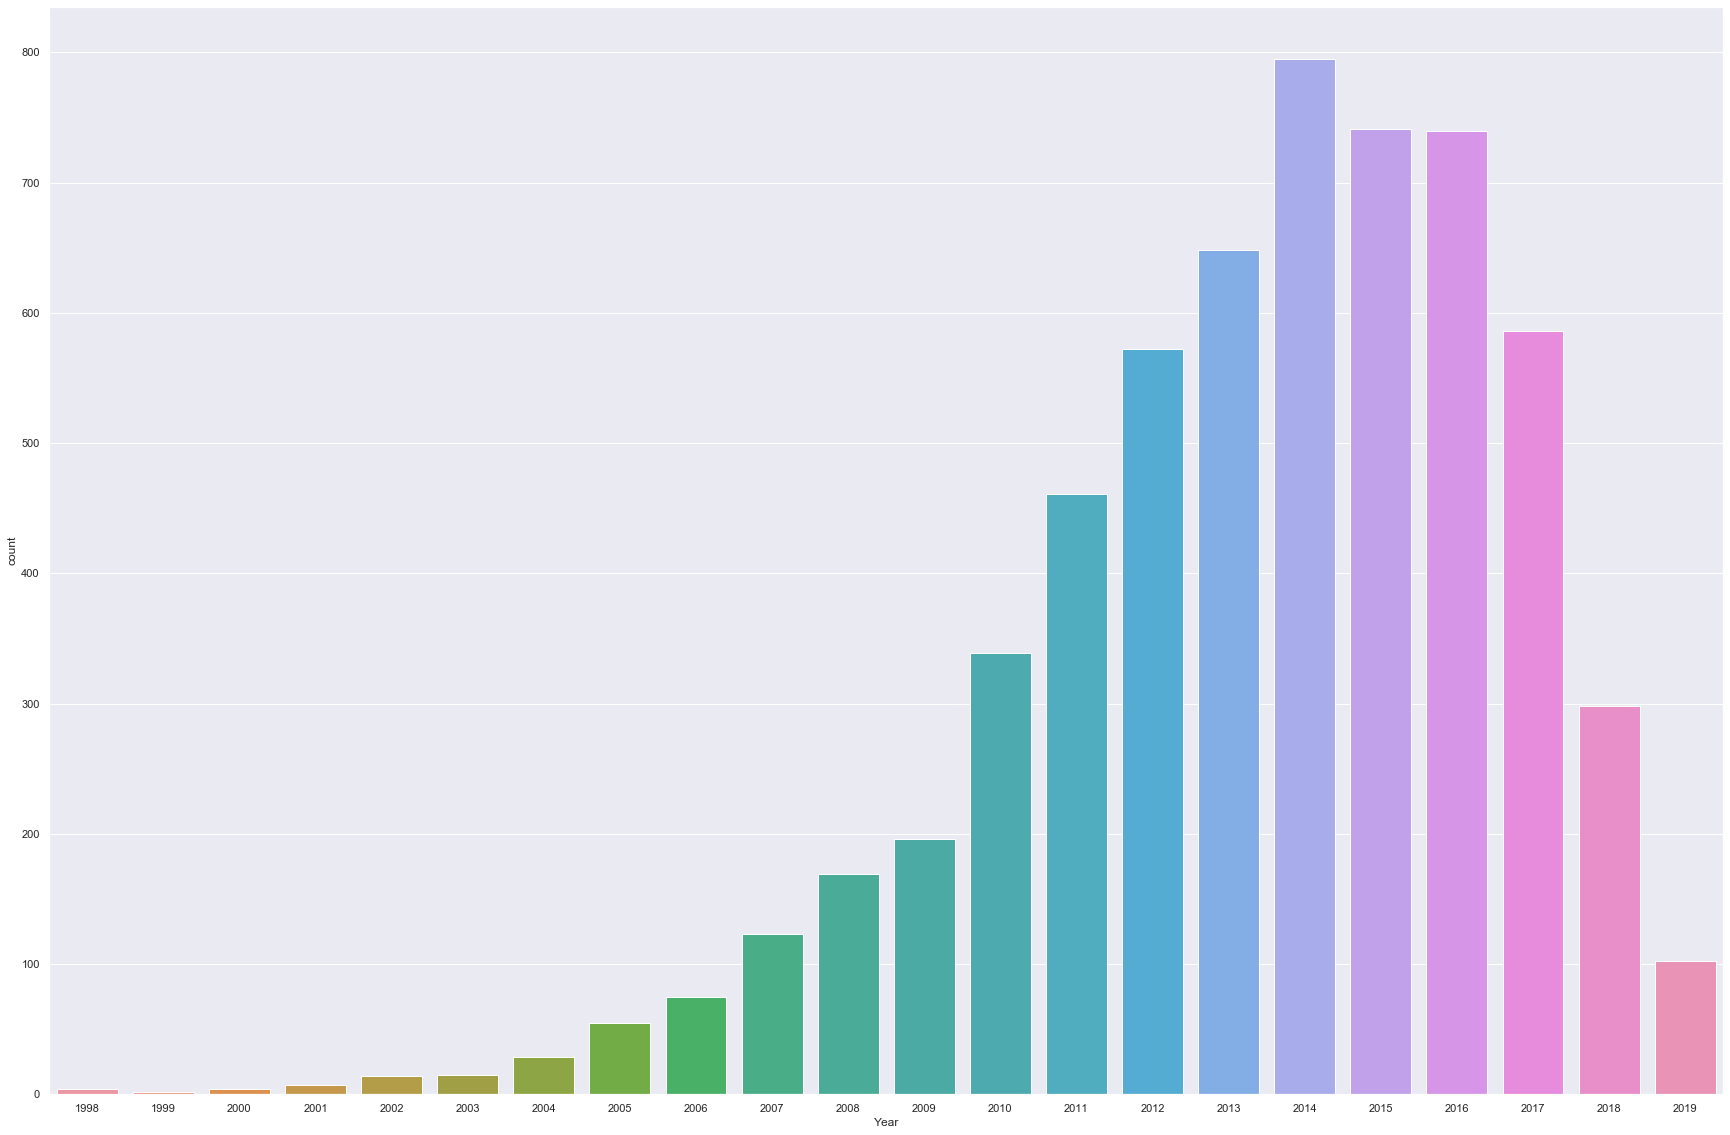

In [32]:
plt.figure(figsize=(30,20))
sns.countplot(x='Year',data=df)

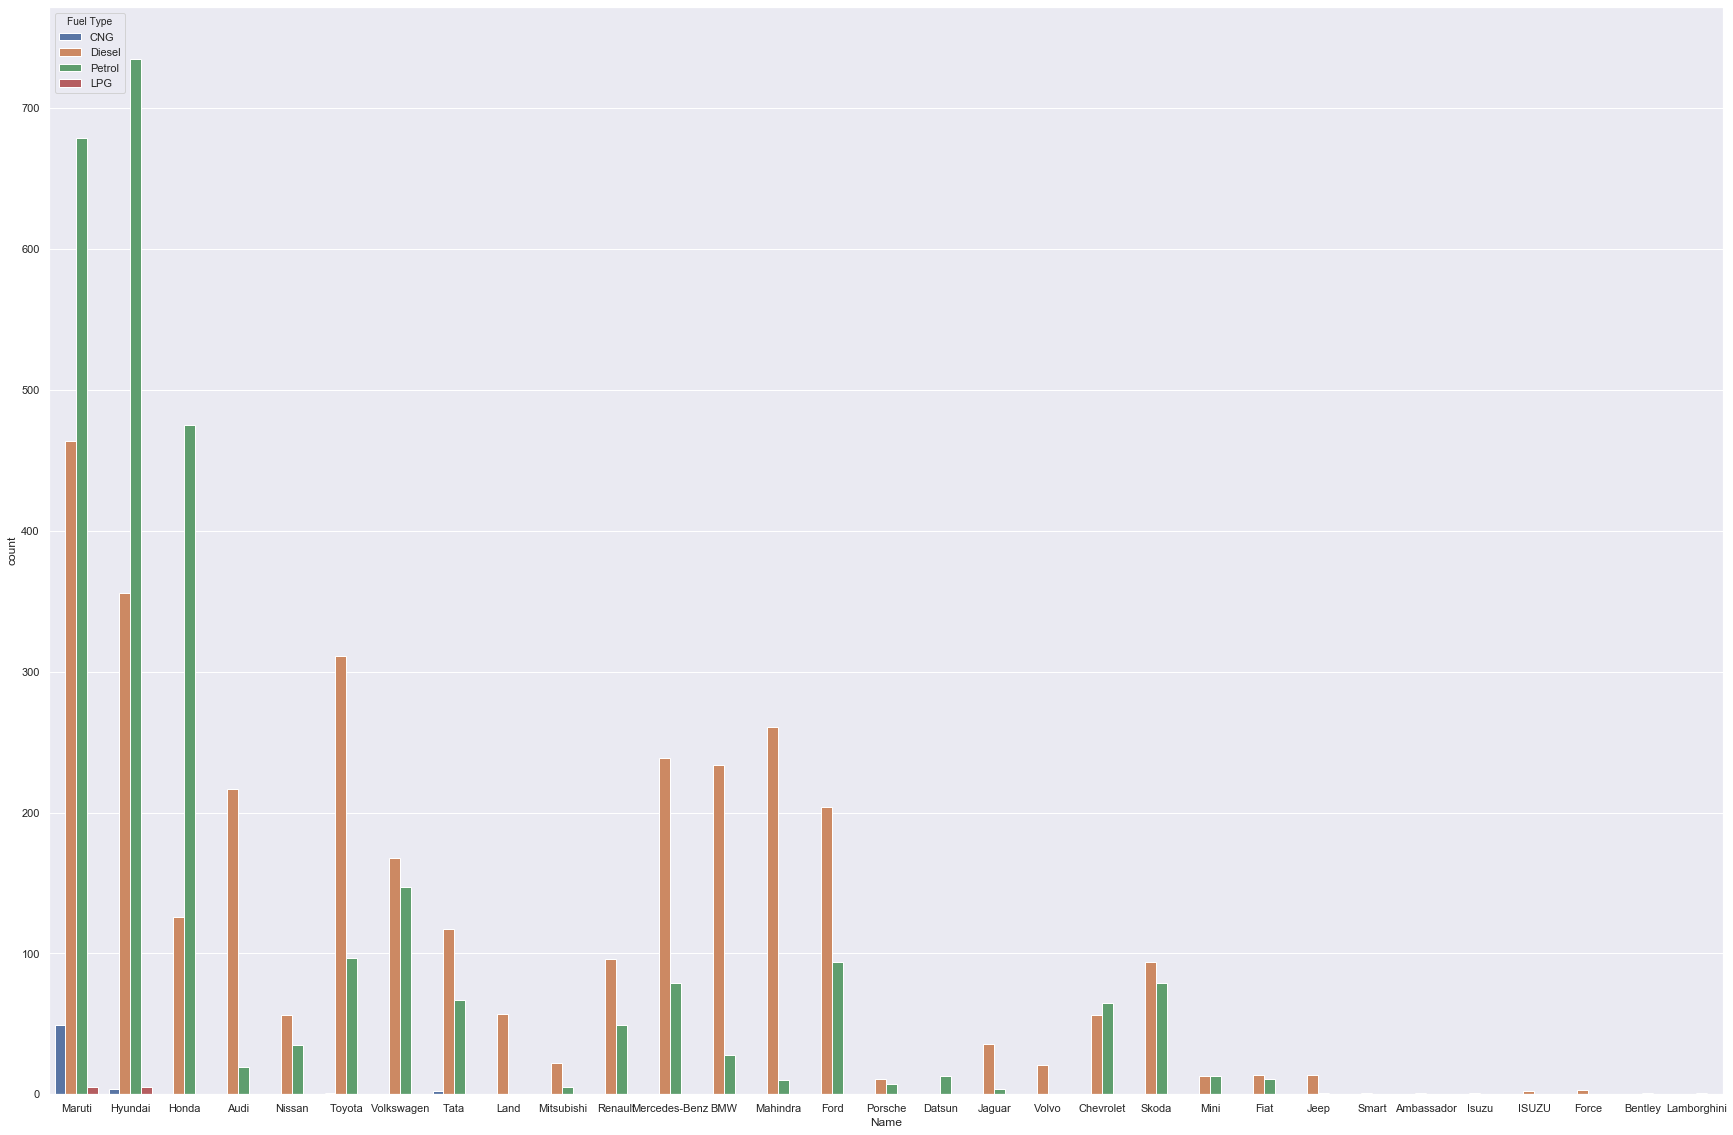

In [33]:
plt.figure(figsize=(30,20))
sns.countplot(x='Name',hue='Fuel Type',data=df)

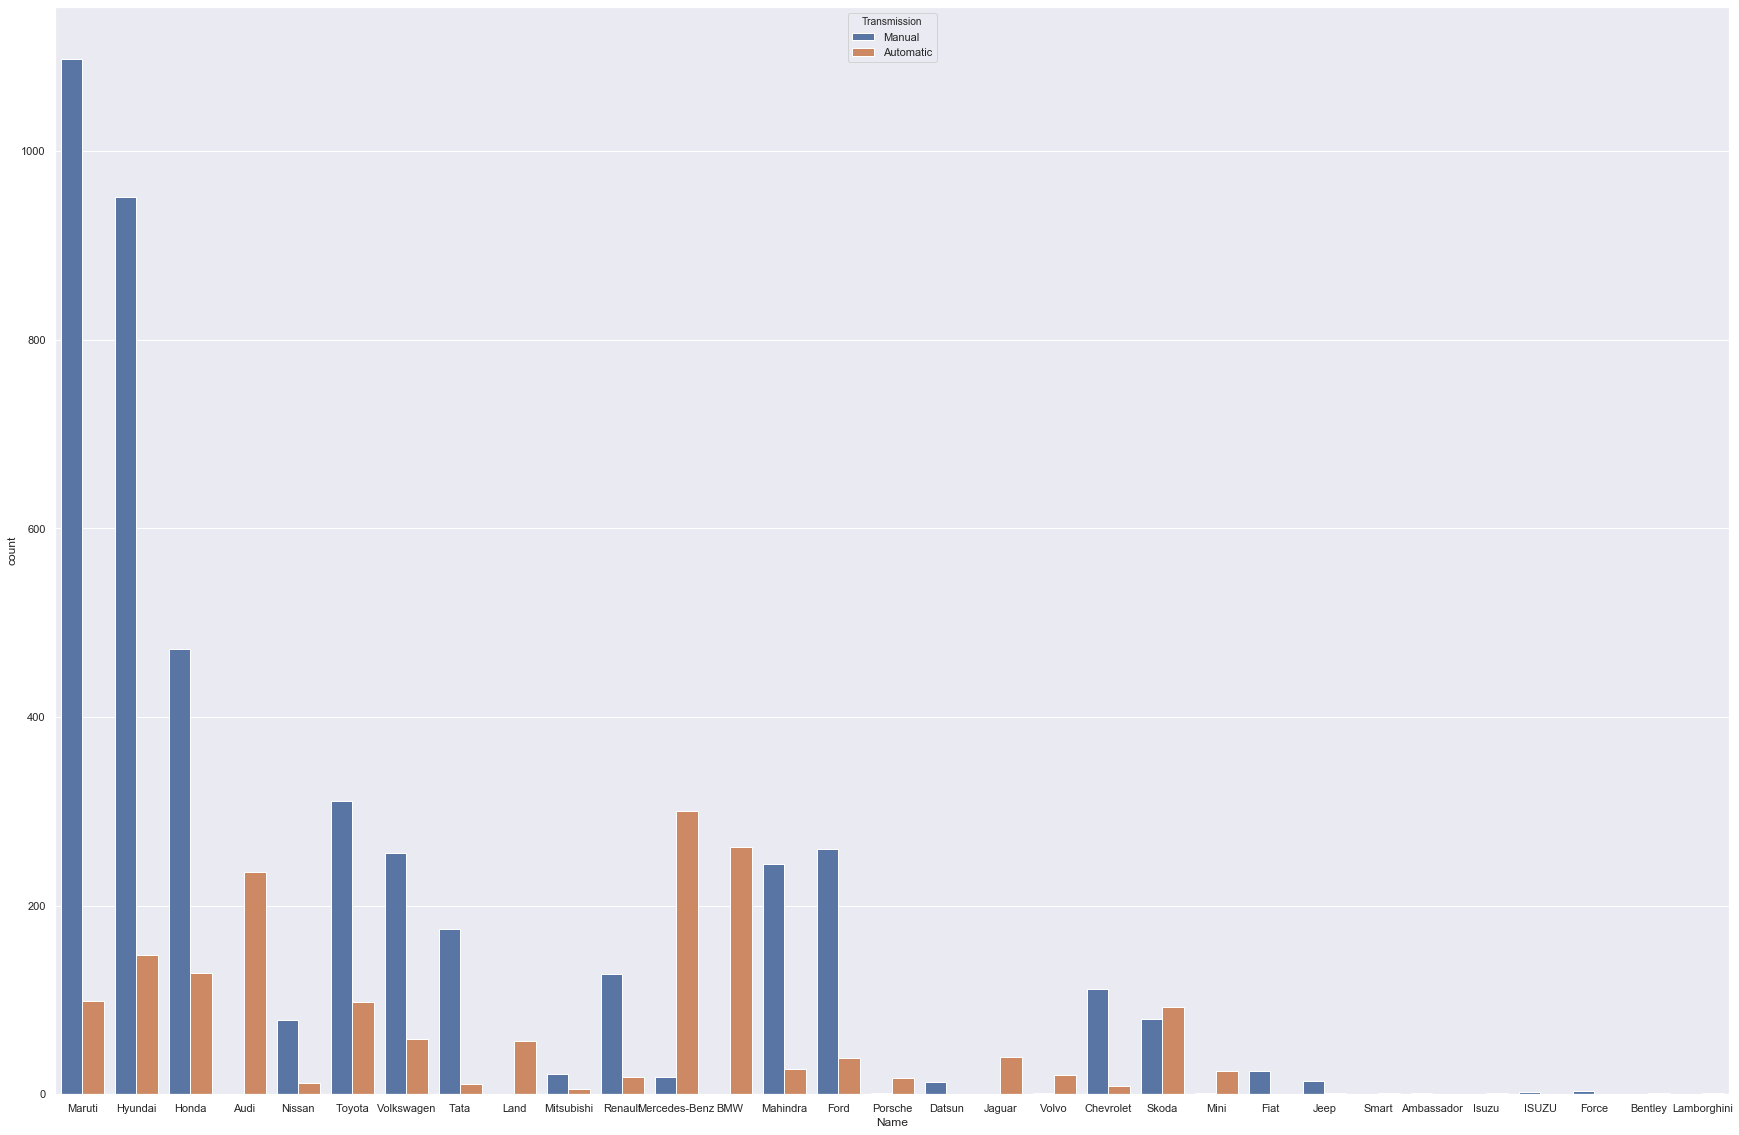

In [34]:
plt.figure(figsize=(30,20))
sns.countplot(x='Name',hue='Transmission',data=df)

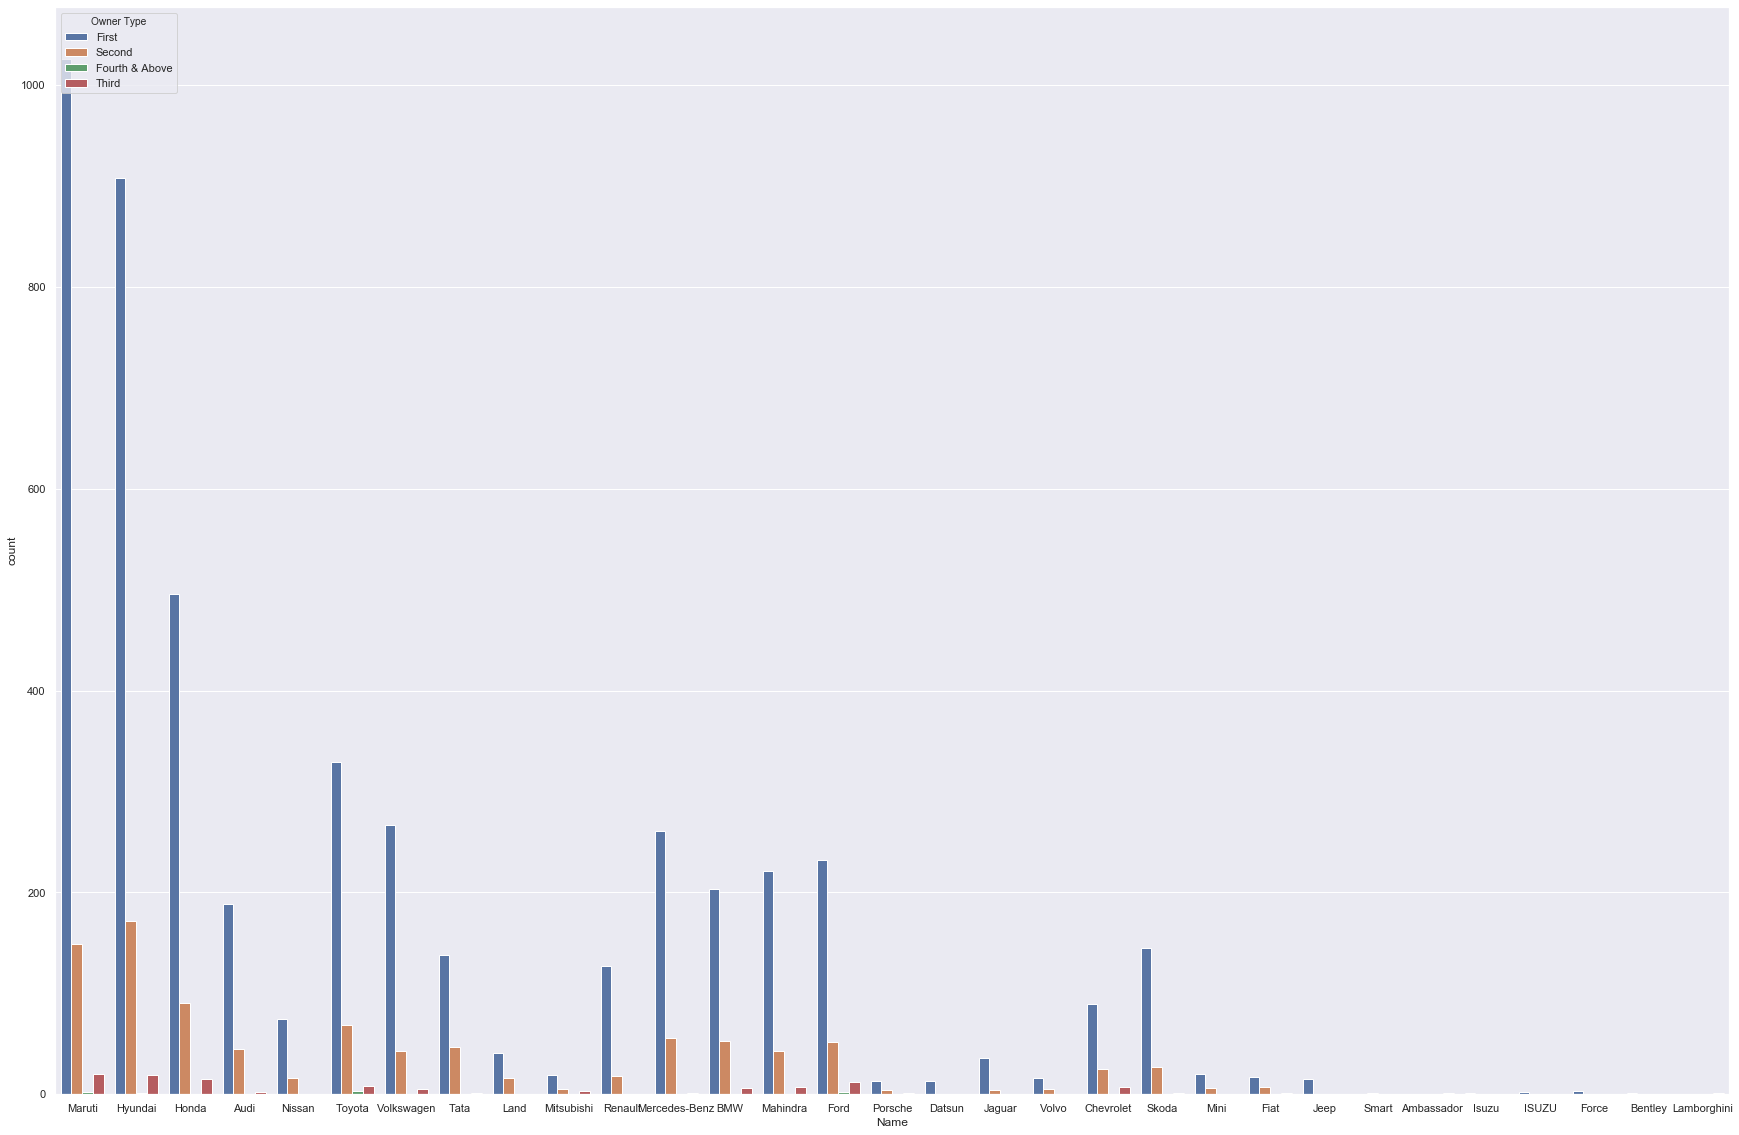

In [35]:
plt.figure(figsize=(30,20))
sns.countplot(x='Name',hue='Owner Type',data=df)

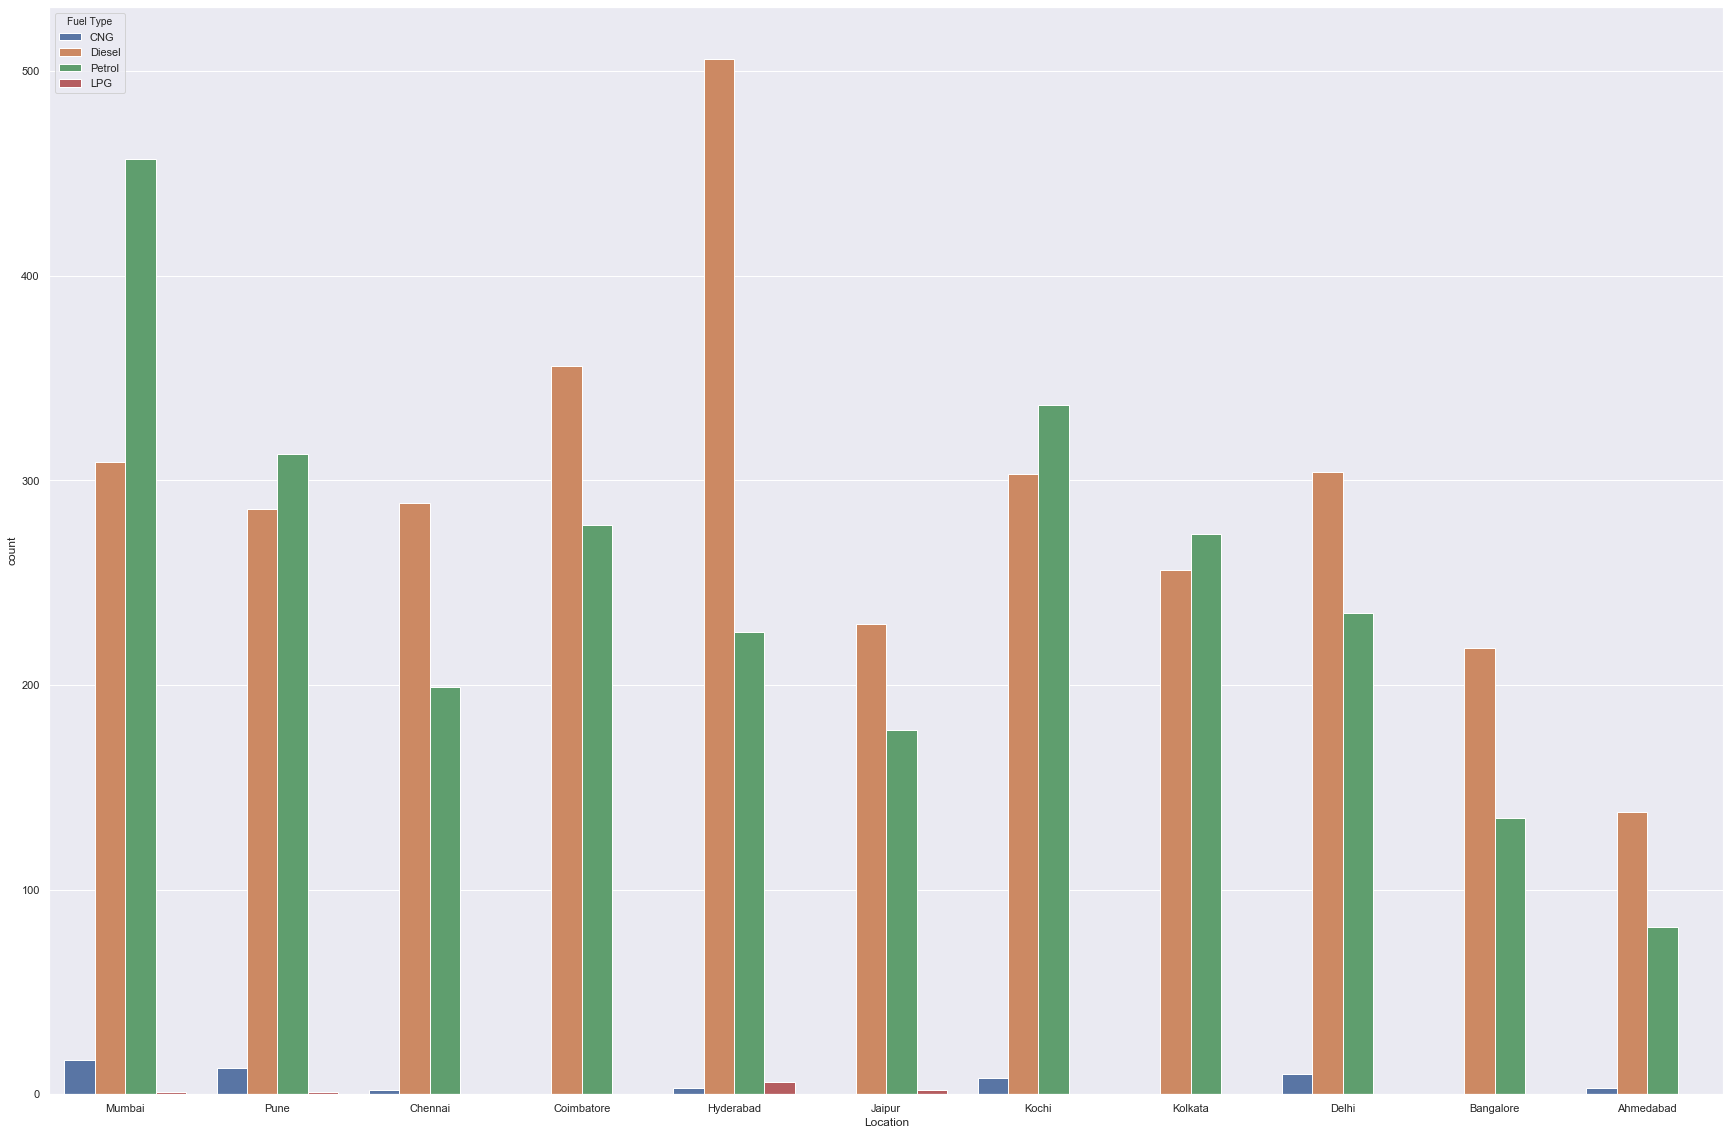

In [36]:
plt.figure(figsize=(30,20))
sns.countplot(x='Location',hue='Fuel Type',data=df)

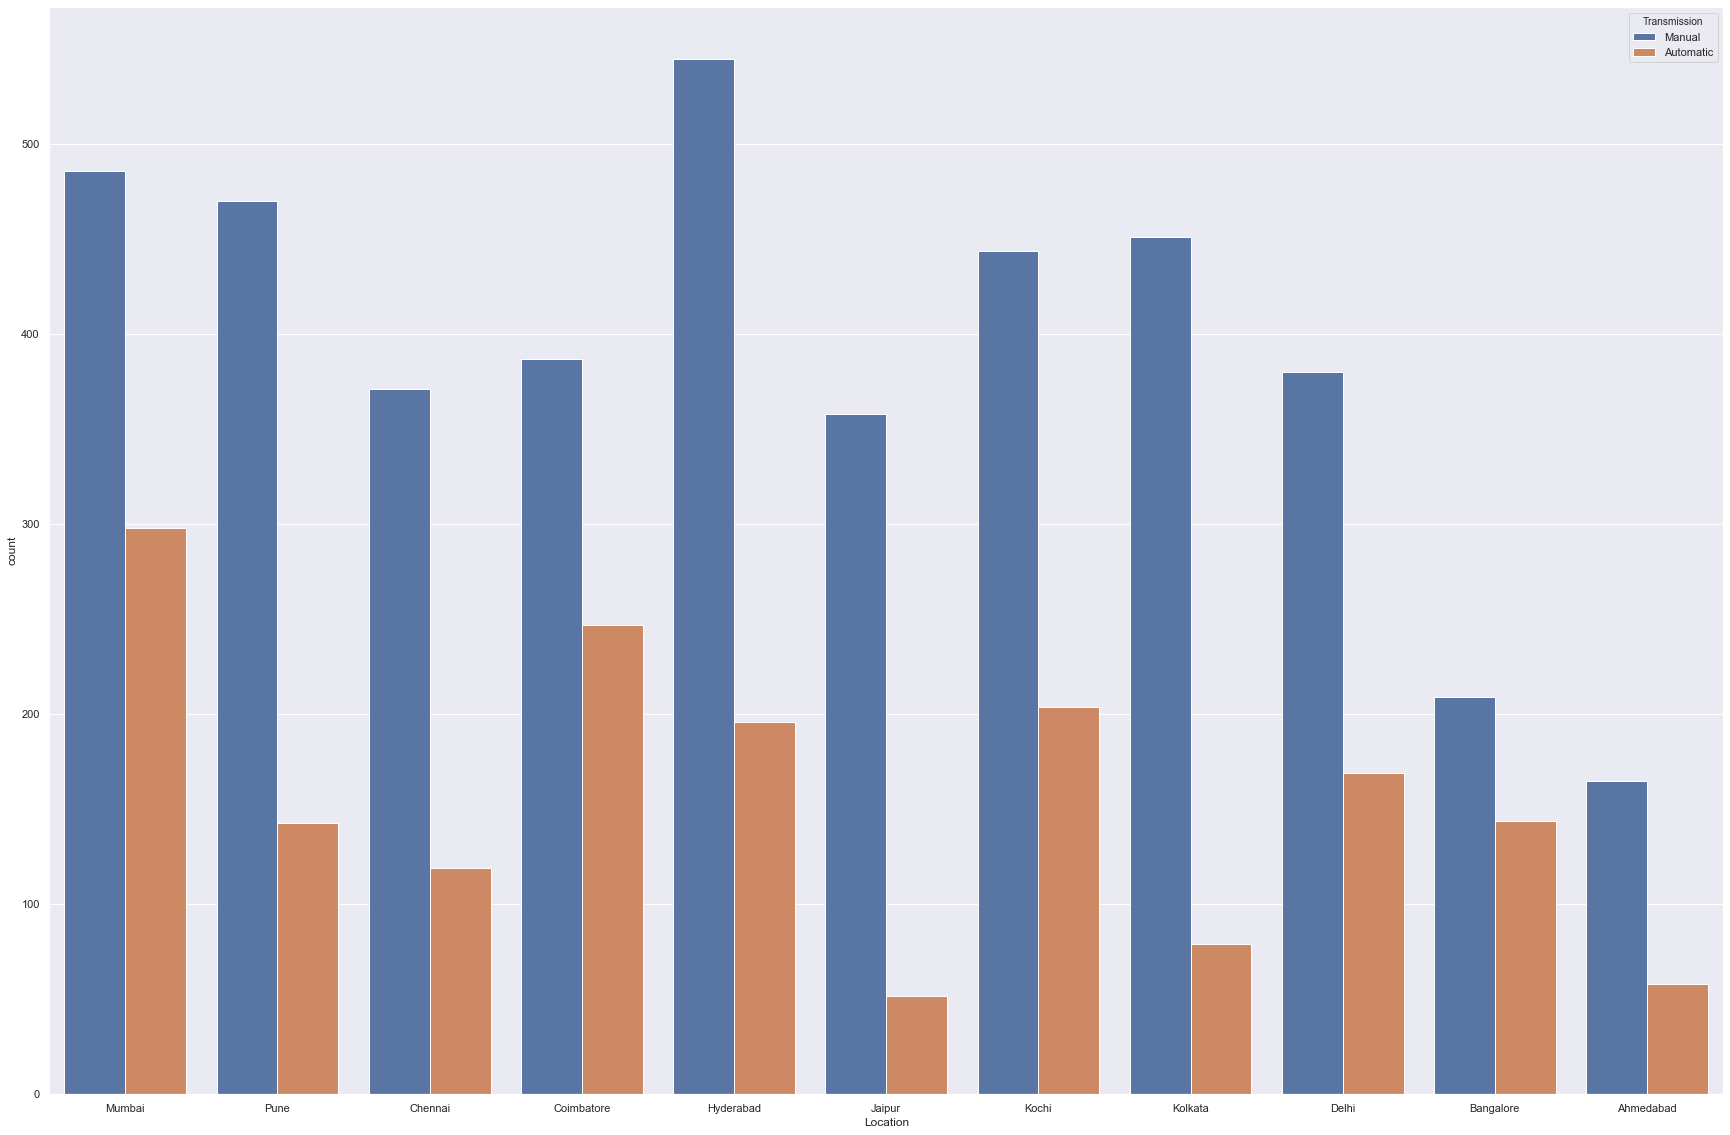

In [37]:
plt.figure(figsize=(30,20))
sns.countplot(x='Location',hue='Transmission',data=df)

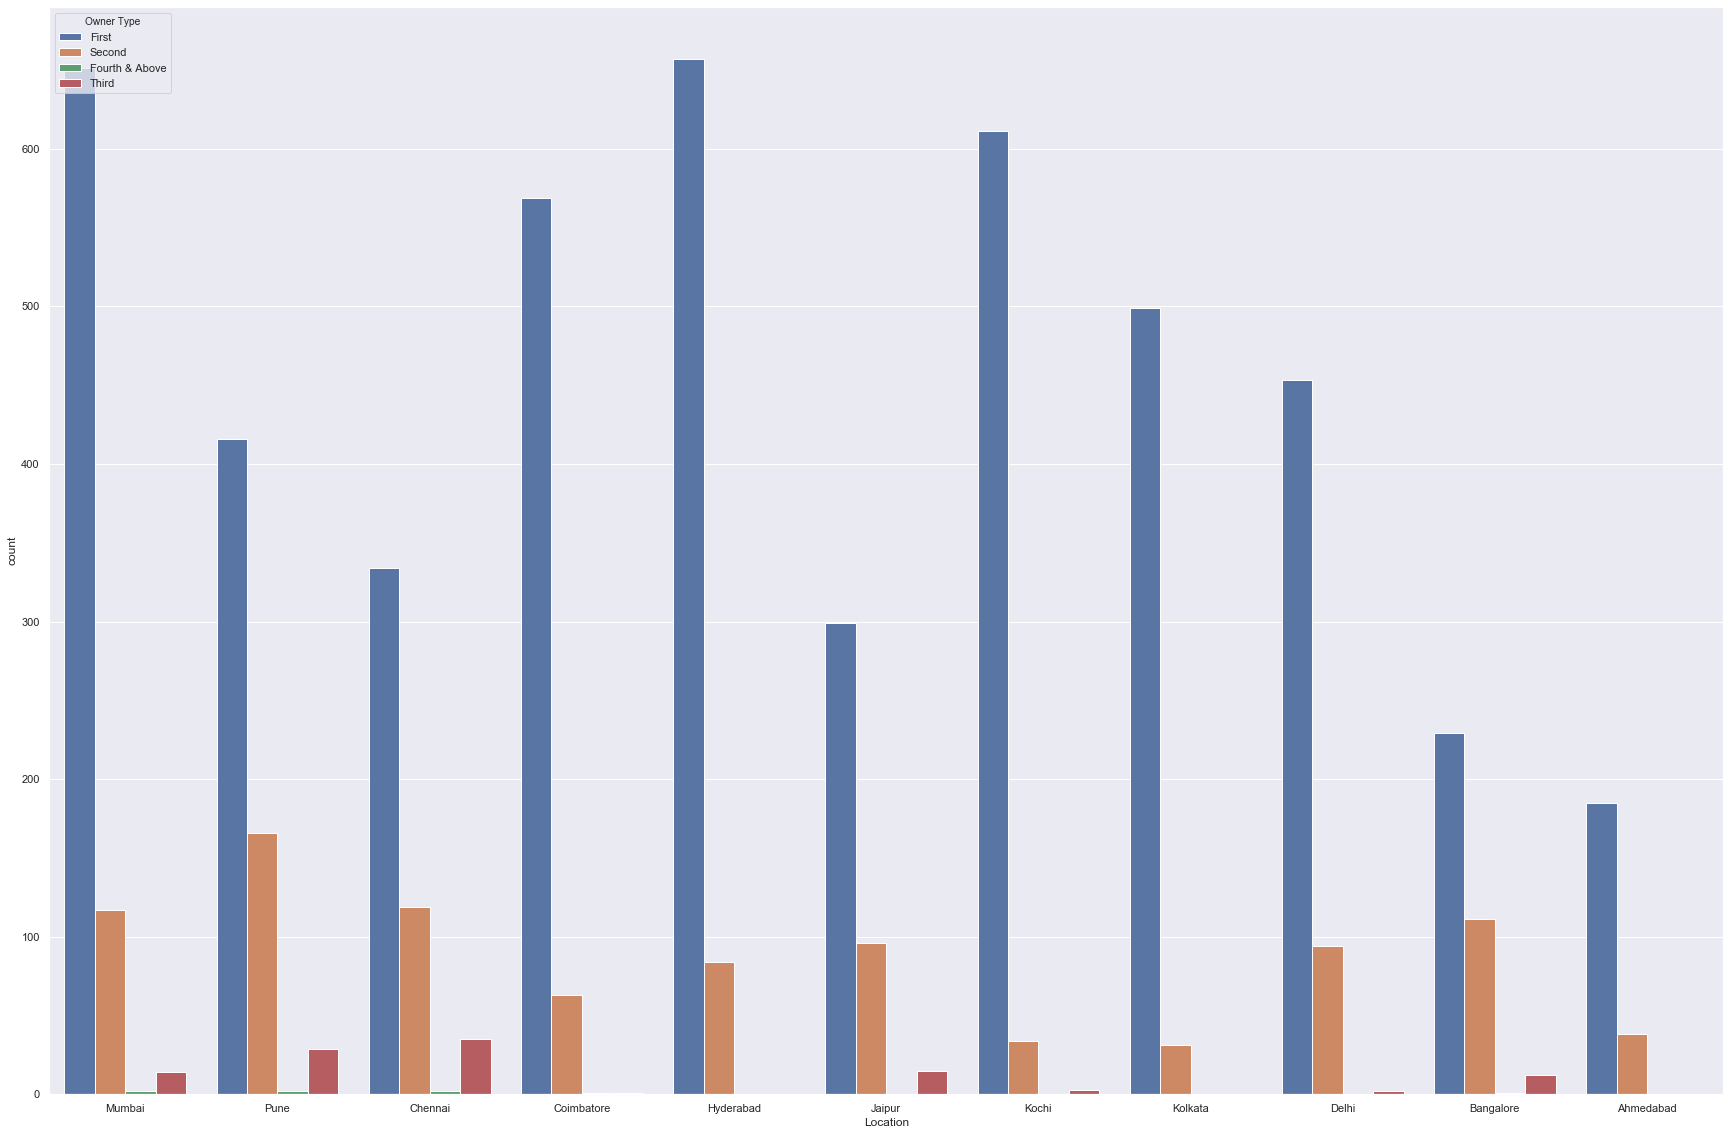

In [38]:
plt.figure(figsize=(30,20))
sns.countplot(x='Location',hue='Owner Type',data=df)

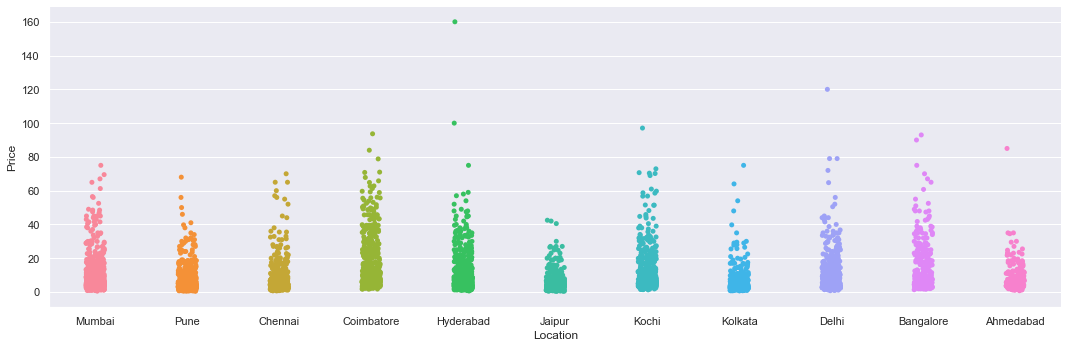

In [39]:
sns.catplot(x="Location", y="Price", data=df,height=5,aspect=3)

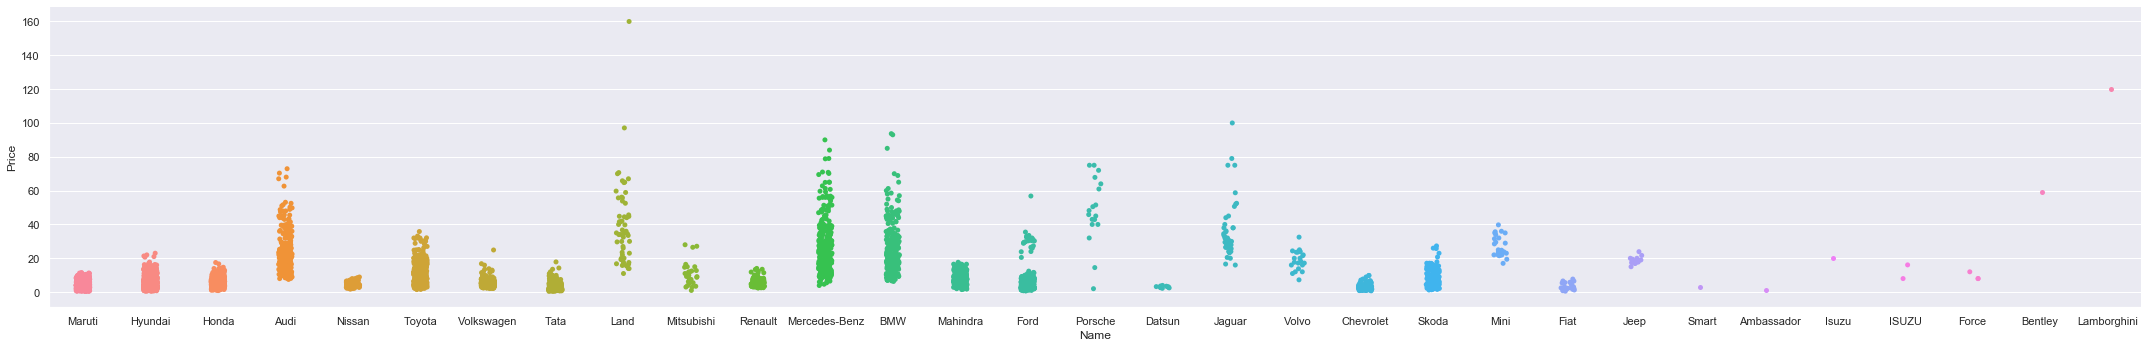

In [40]:
sns.catplot(x="Name", y="Price", data=df,height=5,aspect=6)

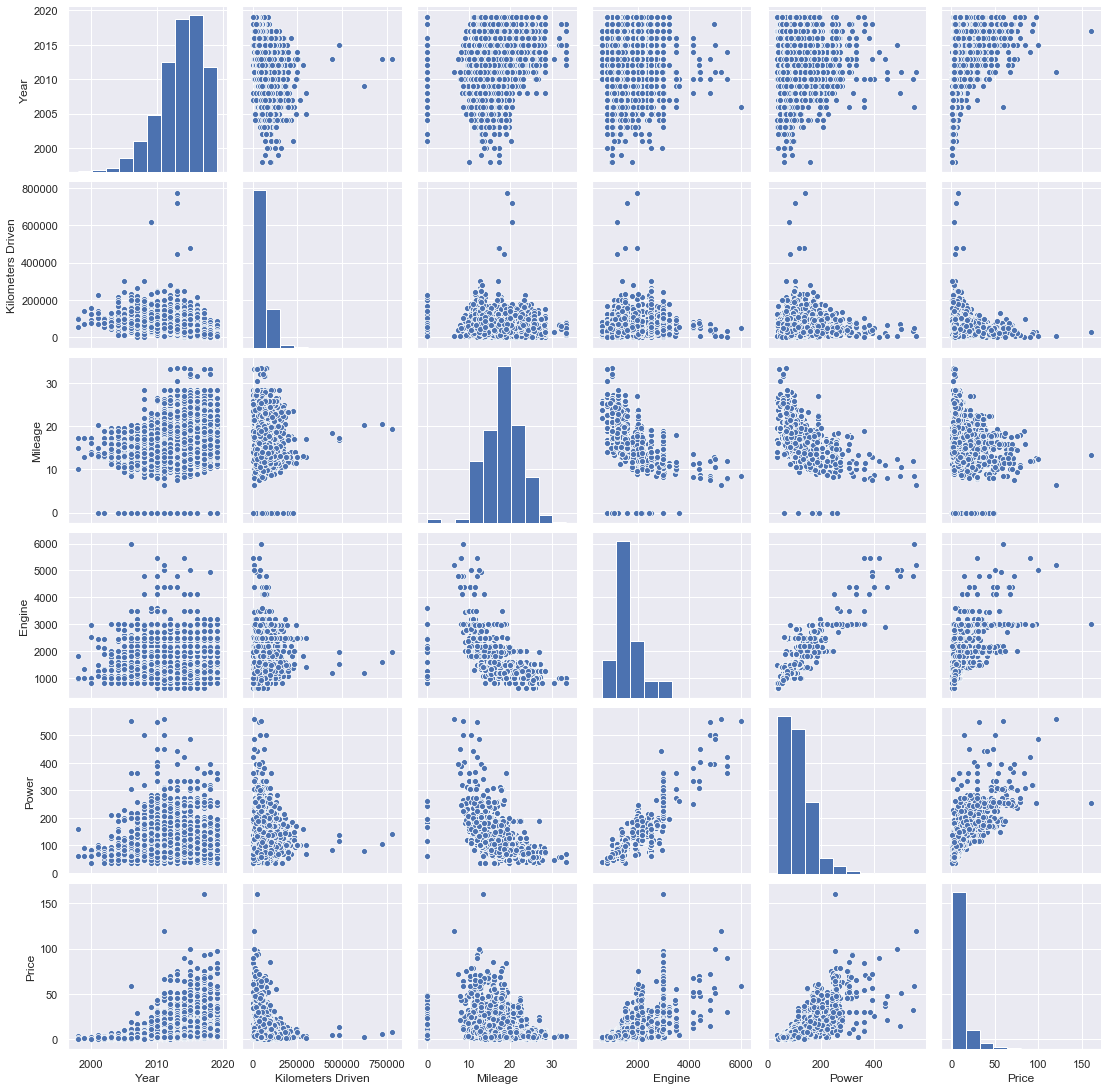

In [41]:
sns.pairplot(df)

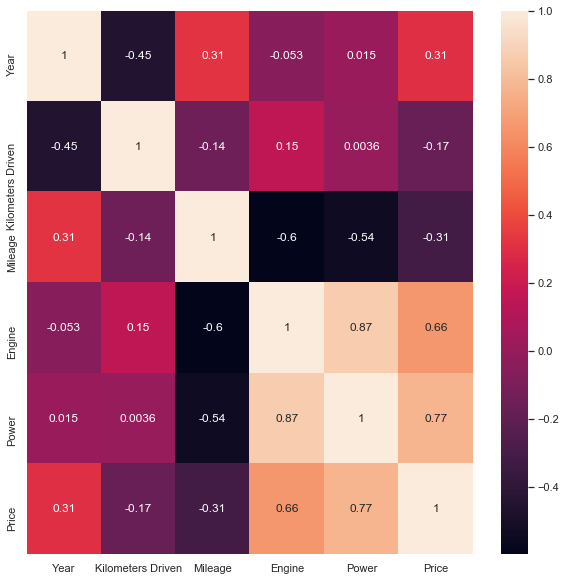

In [42]:
plt.figure(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

## Observations:
1. Most cars were sold in Mumbai and the brand that sold most is Maruti. Sales were maximum in the year 2014.
2. More petrol cars were sold than those with diesel or other fuel types.
3. Cars with manual transmission and those with first hand owners sell more in all locations.
4. Diesel cars are more popular in Hyderabad whereas petrol cars are more popular in Mumbai.
5. Jaipur has least price for car sales.
6. Cars with high price generally sell lower except for Audi, Mercedes-Benz and BMW.
7. Mileage and Kilometers Driven show negative correlation with price whereas others are positively correlated.

# Label and One Hot Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
dfLabel=pd.DataFrame()
labelencoder = LabelEncoder()
dfLabel['NameLabel']=labelencoder.fit_transform(df['Name'])
dfLabel['LocationLabel']=labelencoder.fit_transform(df['Location'])
dfLabel['TransmissionLabel']=labelencoder.fit_transform(df['Transmission'])
dfLabel['OwnerTypeLabel']=labelencoder.fit_transform(df['Owner Type'])
dfLabel['FuelTypeLabel']=labelencoder.fit_transform(df['Fuel Type'])

In [44]:
dfLabel

,NameLabel,LocationLabel,TransmissionLabel,OwnerTypeLabel,FuelTypeLabel
0,18,9,1,0,0
1,10,10,1,0,1
2,9,2,1,0,3
3,18,2,1,0,1
4,1,3,0,2,1
...,...,...,...,...,...
5970,18,4,1,0,1
5971,10,6,1,0,1
5972,17,6,1,2,1
5973,18,8,1,0,3


In [45]:
dfLabel.nunique()

NameLabel            31
LocationLabel        11
TransmissionLabel     2
OwnerTypeLabel        4
FuelTypeLabel         4
dtype: int64

In [46]:
dfOneHot=pd.DataFrame(df)
dfOneHot.drop(['Kilometers Driven','Year','Mileage','Engine','Power','Price'],axis=1)
dummies=pd.get_dummies(dfOneHot,drop_first = True)
dfSecond=dummies
dfSecond

,Year,Kilometers Driven,Mileage,Engine,Power,Price,Name_Audi,Name_BMW,Name_Bentley,Name_Chevrolet,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel Type_Diesel,Fuel Type_LPG,Fuel Type_Petrol,Transmission_Manual,Owner Type_Fourth & Above,Owner Type_Second,Owner Type_Third
0,2010,72000,26.600000,998.0,58.160000,1.75,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2015,41000,19.670000,1582.0,126.199997,12.50,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,2011,46000,18.200001,1199.0,88.699997,4.50,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.770000,1248.0,88.760002,6.00,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2013,40670,15.200000,1968.0,140.800003,17.74,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.400000,1248.0,74.000000,4.75,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6015,2015,100000,24.400000,1120.0,71.000000,4.00,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6016,2012,55000,14.000000,2498.0,112.000000,2.90,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
6017,2013,46000,18.900000,998.0,67.099998,2.65,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0


## Data Scaling

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfarray=np.array(df[['Kilometers Driven','Mileage','Engine','Power']])
dfNew=pd.DataFrame(scaler.fit_transform(dfarray))
dfNew.describe()

,0,1,2,3
count,5975.000000,5975.000000,5975.000000,5872.000000
mean,0.074112,0.542022,0.185636,0.150393
std,0.048917,0.134818,0.111842,0.102476
min,0.000000,0.000000,0.000000,0.000000
25%,0.043541,0.453190,0.106811,0.077596
50%,0.068181,0.541443,0.161705,0.120768
75%,0.093994,0.629100,0.253070,0.197604
max,1.000000,1.000000,1.000000,1.000000


In [48]:
dfSecond['Kilometers Driven']=dfNew[0]
dfSecond.head()

,Year,Kilometers Driven,Mileage,Engine,Power,Price,Name_Audi,Name_BMW,Name_Bentley,Name_Chevrolet,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel Type_Diesel,Fuel Type_LPG,Fuel Type_Petrol,Transmission_Manual,Owner Type_Fourth & Above,Owner Type_Second,Owner Type_Third
0,2010,0.092703,26.600000,998.0,58.160000,1.75,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2015,0.052694,19.670000,1582.0,126.199997,12.50,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,2011,0.059147,18.200001,1199.0,88.699997,4.50,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,0.112062,20.770000,1248.0,88.760002,6.00,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2013,0.052268,15.200000,1968.0,140.800003,17.74,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [49]:
dfSecond.isnull().any()

Year                         False
Kilometers Driven             True
Mileage                      False
Engine                       False
Power                         True
Price                        False
Name_Audi                    False
Name_BMW                     False
Name_Bentley                 False
Name_Chevrolet               False
Name_Datsun                  False
Name_Fiat                    False
Name_Force                   False
Name_Ford                    False
Name_Honda                   False
Name_Hyundai                 False
Name_ISUZU                   False
Name_Isuzu                   False
Name_Jaguar                  False
Name_Jeep                    False
Name_Lamborghini             False
Name_Land                    False
Name_Mahindra                False
Name_Maruti                  False
Name_Mercedes-Benz           False
Name_Mini                    False
Name_Mitsubishi              False
Name_Nissan                  False
Name_Porsche        

In [50]:
dfSecond.dropna(axis=0,inplace=True)
df.dropna(axis=0,inplace=True)

In [51]:
dfSecond.isnull().any()

Year                         False
Kilometers Driven            False
Mileage                      False
Engine                       False
Power                        False
Price                        False
Name_Audi                    False
Name_BMW                     False
Name_Bentley                 False
Name_Chevrolet               False
Name_Datsun                  False
Name_Fiat                    False
Name_Force                   False
Name_Ford                    False
Name_Honda                   False
Name_Hyundai                 False
Name_ISUZU                   False
Name_Isuzu                   False
Name_Jaguar                  False
Name_Jeep                    False
Name_Lamborghini             False
Name_Land                    False
Name_Mahindra                False
Name_Maruti                  False
Name_Mercedes-Benz           False
Name_Mini                    False
Name_Mitsubishi              False
Name_Nissan                  False
Name_Porsche        

In [52]:
df.isnull().any()

Name                 False
Location             False
Year                 False
Kilometers Driven    False
Fuel Type            False
Transmission         False
Owner Type           False
Mileage              False
Engine               False
Power                False
Price                False
dtype: bool

## Train/Test split

In [53]:
from sklearn.model_selection import train_test_split
dfT=pd.DataFrame(dfSecond)
dfT=dfT.drop(['Price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(dfT, dfSecond['Price'], test_size=0.2,random_state=0)

In [54]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4663, 52), (1166, 52), (4663,), (1166,))

## Linear Regression model

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [87]:
dfR=pd.DataFrame(dfSecond)
dfR=dfR.drop(['Price'],axis=1)
coeff_df = pd.DataFrame(regressor.coef_,dfR.columns , columns=['Coefficient'])  
coeff_df

,Coefficient
Year,1.055184e+00
Kilometers Driven,2.724003e+00
Mileage,-1.479596e-01
Engine,1.455929e-03
Power,8.150868e-02
Name_Audi,1.231821e-01
Name_BMW,-1.224291e+00
Name_Bentley,5.456782e+00
Name_Chevrolet,-9.778269e+00
Name_Datsun,-1.102035e+01


In [88]:
r2_score(y_test, y_pred)

0.792828519504862

In [90]:
mean_squared_error(y_test, y_pred)

32.803789951201686

## Polynomial Regression

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)  
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

In [115]:
r2_score(y_test, y_test_predict)

-805.3020731538505

In [116]:
mean_squared_error(y_test, y_test_predict)

127670.87333518433

## Ridge Regression

In [128]:
from sklearn.linear_model import Ridge
RidgeModel=Ridge(alpha=0.0001)
RidgeModel.fit(X_train, y_train)
y_predict=RidgeModel.predict(X_test)

In [129]:
r2_score(y_test, y_predict)

0.7928181484694133

In [130]:
mean_squared_error(y_test, y_predict)

32.80543211385661

## Lasso Regression

In [131]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(normalize=False)
lasso_reg.fit(X_train,y_train)
y_pred_lass =lasso_reg.predict(X_test)

In [132]:
r2_score(y_test,y_pred_lass )

0.7265096897981245

In [133]:
mean_squared_error(y_test,y_pred_lass )

43.30479595024116

## RandomForestRegressor

In [134]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
y_pred_regr=regr.predict(X_test)

In [135]:
r2_score(y_test,y_pred_regr )

0.6629418396621448

In [136]:
mean_squared_error(y_test,y_pred_regr )

53.3702084217183

Therefore, using R2 values and MSE values it is shown that Linear Regression and Ridge Regression models are the most appropriate to predict the price of used cars.